### Factors Driving Life Expectancy : Do immunization matters?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
import os
from scipy.stats import t

from library.sb_utils import save_file

In [2]:
sns.set()
sns.set_context("notebook")

#### Importing Data

In [3]:
df1 = pd.read_csv("../data/life_exp_clean.csv")

In [4]:
df1.head(2)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,year,population
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2015,17.334091
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2014,12.699494


In [5]:
df1.shape

(2928, 24)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   object 
 2   Status                           2928 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   Alcohol                          2735 non-null   float64
 7   percentage_expenditure           2322 non-null   float64
 8   Hepatitis_B                      2375 non-null   float64
 9   Measles                          1955 non-null   float64
 10  BMI                              2896 non-null   float64
 11  under_five_deaths                2153 non-null   float64
 12  Polio               

In [7]:
# convert Year to datetime object 
df1.Year = pd.to_datetime(df1.Year, format='%Y-%d-%m')

Note:  there is 

### Distribution of features

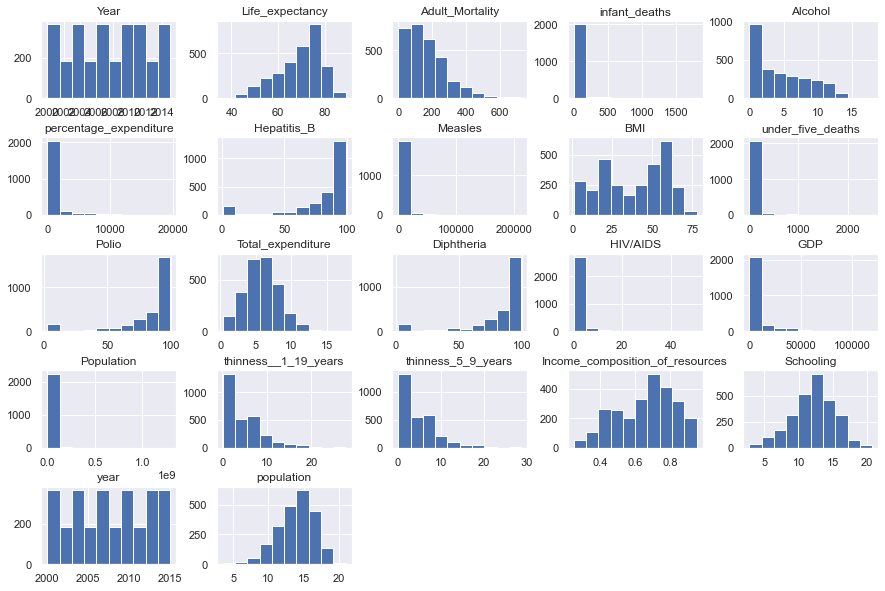

In [8]:
#view the distribution of data 
df1.hist(figsize=(15, 10) )
plt.subplots_adjust(hspace=0.5);

### is the Status of the country has an impact on life expectancy?

In [9]:
df_developing = df1[df1['Status']=='Developing']
df_developed = df1[df1['Status']=='Developed']

1- we have to compare two independant group wiht inequal sample

In [10]:
developing = df1[df1['Status']=='Developing']['Life_expectancy']
developed = df1[df1['Status']=='Developed']['Life_expectancy']

In [11]:
print('developing is ',len(developing),'observations',' developed is ', len(developed),'observations')

developing is  2416 observations  developed is  512 observations


### How does the distribution look like?

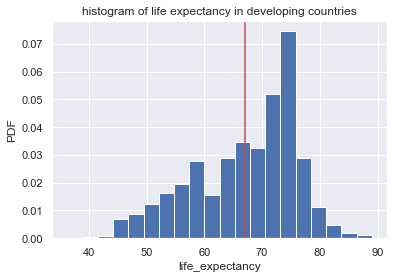

In [12]:
# histogram of life expectancy in developed and developing countries 
_ = plt.hist(developing, bins=20, density=True)
_ = plt.axvline(np.mean(developing), color='r')
_ = plt.xlabel('life_expectancy')
_ = plt.ylabel('PDF')
_ = plt.title('histogram of life expectancy in developing countries')
_ = plt.show()

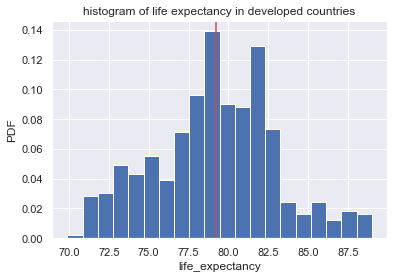

In [13]:
# histogram of life expectancy in developed and developing countries 
_ = plt.hist(developed, bins=20, density=True)
_ = plt.axvline(np.mean(developed), color='r')
_ = plt.xlabel('life_expectancy')
_ = plt.ylabel('PDF')
_ = plt.title('histogram of life expectancy in developed countries')
_ = plt.show()

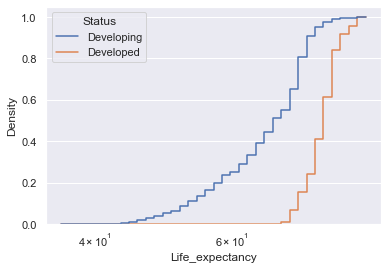

In [14]:
sns.histplot(
    data=df1, x="Life_expectancy", hue="Status",
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n  # or y = np.arange(1, len(x)+1)/len(x)

    return x, y

### plot the distribution of the two populations

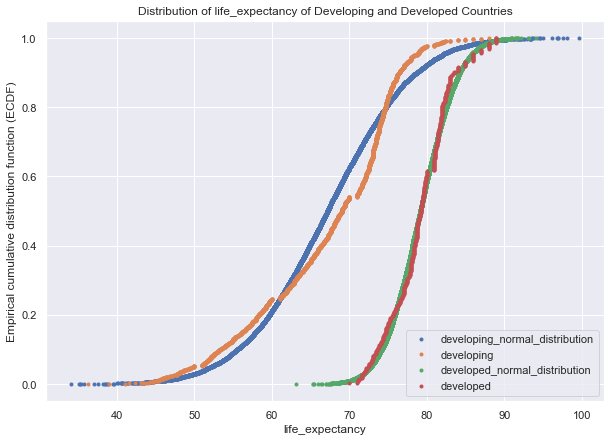

In [16]:
#Sample out of a normal distribution with this mu and sigma: developing_norm
mu = np.mean(developing)
sigma = np.std(developing)
developing_norm = np.random.normal(mu, sigma, size=10000)
#Sample out of a normal distribution with this mu and sigma: developed_norm
mu = np.mean(developed)
sigma = np.std(developed)
developed_norm = np.random.normal(mu, sigma, size=10000)
# Compute ECDFs
x,y = ecdf(developing_norm)
x_dp,y_dp = ecdf(developing)
xx, yy = ecdf(developed_norm)
x_dd, y_dd = ecdf(developed)

plt.figure(figsize=(10, 7))
# Plot all ECDFs on the same plot
_=plt.plot(x,y, marker='.', linestyle='none' )
_=plt.plot(x_dp, y_dp,marker='.', linestyle='none')
_=plt.plot(xx,yy, marker='.', linestyle='none' )
_=plt.plot(x_dd, y_dd,marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('developing_normal_distribution', 'developing', 'developed_normal_distribution','developed'), loc='lower right')
_ = plt.xlabel('life_expectancy')
_ = plt.ylabel('Empirical cumulative distribution function (ECDF)')
_ = plt.title('Distribution of life_expectancy of Developing and Developed Countries')
_ = plt.show()

In [17]:
from scipy import stats
# Using the stats.normaltest() method, get an indication of whether the data are normally distributed

In [18]:
k, p = stats.normaltest(developing)
alpha = 0.05 # alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: the population has a normal distribution
    print("The null hypothesis can be rejected") #  The data do not follow a normal distribution (Reject H0)
else:
    print("The null hypothesis cannot be rejected")

p = 3.4988e-34
The null hypothesis can be rejected


In [19]:
k, p = stats.normaltest(developed)
alpha = 0.05 # alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: the population has a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.599307
The null hypothesis cannot be rejected


Note: The result above confirm what we see in the figure. Data from developing are not normaly distributed , and one form developed is normaly distributed. 

#### Get some statistic : we applied the central limit theorem and , find how spred is the life_expectency in the population?

In [20]:
def std_dev_sample(arr):
    n = len(arr)-1
    mean = np.mean(arr) 
    var =  sum((x - mean)**2 for x in arr) / n
    std_dev = np.sqrt(var) #var ** 0.5
    return std_dev

In [21]:
std_dp = np.std(developing)
std_dd = np.std(developed)
mean_dp = np.mean(developing)
mean_dd = np.mean(developed)
print('standard deviation of developing countries is' , std_dp)
print('standard deviation of developed countries is' , std_dd)
print('average life_expectancy of developing countries is',  mean_dp)
print('average life_expectancy of developed countries is', mean_dd)

standard deviation of developing countries is 9.004228045064881
standard deviation of developed countries is 3.9271012579848645
average life_expectancy of developing countries is 67.11146523178817
average life_expectancy of developed countries is 79.19785156249996


In [22]:
def sampling(population, n):
    return np.random.choice(population, n)

In [23]:
def boostrap_one_sample(arr, func):
    bs_sample = np.random.choice(arr, len(arr)) # one boostrap sample
    return func(bs_sample) # one boostrap replicate 

def boostrap_rep_many(arr, func, size=1):
    
    bs_sample_rep = np.empty(size) # fill all the mean  from all boostrap_one_sample
    
    for i in range(size):  # number of replicate to compute as the mean 
        bs_sample_rep[i] = boostrap_one_sample(arr, func) # cumpute one replicate or one mean
    return bs_sample_rep 

In [24]:
np.random.seed(47)
developing_s = sampling(developing, 100)
developed_s = sampling(developed, 100)

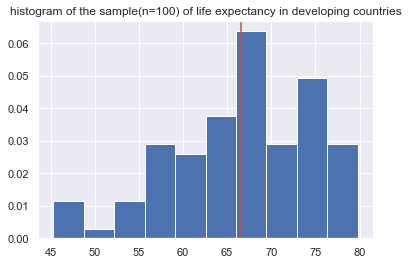

In [25]:
_ = plt.hist(developing_s, bins=10, density = True)
_ = plt.axvline(np.mean(developing_s), color='r')
_ = plt.title('histogram of the sample(n=100) of life expectancy in developing countries')
_ = plt.show()

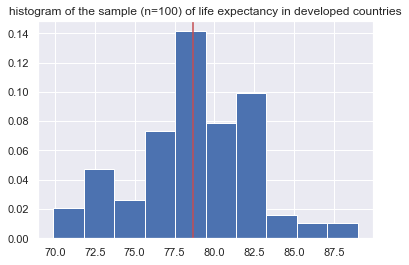

In [26]:
_ = plt.hist(developed_s, bins=10, density = True)
_ = plt.axvline(np.mean(developed_s), color='r')
_ = plt.title('histogram of the sample (n=100) of life expectancy in developed countries')
_ = plt.show()

In [27]:
np.random.seed(47)
bs_sample_dp= boostrap_rep_many(developing_s, np.mean, 5000)
bs_sample_dd = boostrap_rep_many(developed_s, np.mean, 5000)

### Developing Countries life_expectancy - boostrap mean

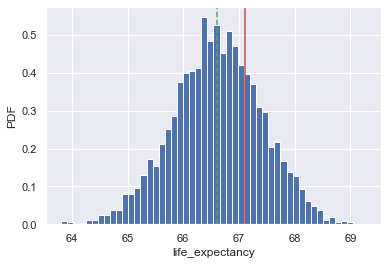

In [28]:
#  histogram of bs_sample_dp
_ = plt.hist(bs_sample_dp, bins=50, density=True)
_ = plt.axvline(np.mean(developing), color='r')
_ = plt.axvline(np.mean(bs_sample_dp), color='g', linestyle='--')
_ = plt.xlabel('life_expectancy')
_ = plt.ylabel('PDF')
_ = plt.show()

In [29]:
k, p = stats.normaltest(bs_sample_dp)
alpha = 0.05 # alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: the population has a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.059395
The null hypothesis cannot be rejected


Note: the aggregated measure of mean is normaly distributed  in developing countries

### Developed Countries life_expectancy - boostrap mean

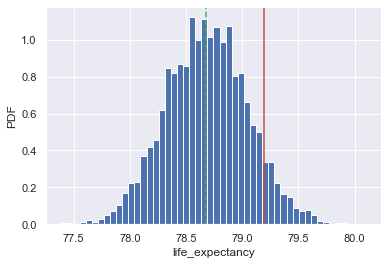

In [30]:
#  histogram of bs_sample_dd
_ = plt.hist(bs_sample_dd, bins=50, density=True)
_ = plt.axvline(np.mean(developed), color='r')
_ = plt.axvline(np.mean(bs_sample_dd), color='g', linestyle='--')
_ = plt.xlabel('life_expectancy')
_ = plt.ylabel('PDF')

### What is the confidence Interval of life_expectancy in both countries (developed and developing) at 95%

In [31]:
#standard error of the mean  (std_population/np.sqrt(n))
SEM_dp =  np.std(developing)/np.sqrt(len(developing_s))
SEM_dd =  np.std(developed)/np.sqrt(len(developed_s))
mean_dp = np.mean(developing_s)
mean_dd = np.mean(developed_s)
SEM_dp, SEM_dd

(0.9004228045064882, 0.39271012579848646)

In [32]:
#critical Z value for the selected confidence interval (95%).
alpha = 1 - 0.95
prob = 0.95
critical_value = stats.norm.ppf(1 - 0.05/2)
print(critical_value)

1.959963984540054


In [33]:
# compte the margin error 
margin_error_dp = critical_value * SEM_dp # developing countrie
margin_error_dd = critical_value * SEM_dd # developed countries
margin_error_dp, margin_error_dd

(1.7647962676912667, 0.7696977029292275)

In [34]:
# compte the the 95% confidence interval  it is the (mean +/- 1.6 std)
CI_dp = [mean_dp - margin_error_dp, mean_dp + margin_error_dp]
CI_dd =  [mean_dd - margin_error_dd, mean_dd + margin_error_dd]
print('confidence interval of life_expectancy in developing countries is', CI_dp)
print('confidence interval of life_expectancy in developed countries is', CI_dd)

confidence interval of life_expectancy in developing countries is [64.83420373230872, 68.36379626769126]
confidence interval of life_expectancy in developed countries is [77.91130229707078, 79.45069770292922]


In [35]:
print('confidence interval of life_expectancy in developing countries is', np.percentile(bs_sample_dp, [2.5, 97.5]))
print('confidence interval of life_expectancy in developed countries is', np.percentile(bs_sample_dd, [2.5, 97.5]))

confidence interval of life_expectancy in developing countries is [64.9899 68.135 ]
confidence interval of life_expectancy in developed countries is [77.979   79.40405]


In [36]:
from scipy import stats

### 1- state the hypothesis

the average mean of life expectancy from developed countries is always grether than the one of developing Countries

ho: mean_developed = mean_developing

h1: mean_developed != mean_developing

### 2- state the significance level  (here we set the threshold for the test)

alpha = 0.05 or 5%   z= 1.96 for one tail, and z= 1,64 for two tail

#### 3- identify the test statistic

we are going to conduct a Z test for 2 independants  samples, 

In [37]:
from scipy.stats import ttest_ind
import numpy as np

##### T Test with the boostrap mean of life expectancy in both country

In [38]:
ttest,pval = ttest_ind(bs_sample_dp, bs_sample_dd)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


##### Z Test with the boostrap mean of life expectancy in both country

In [40]:
from statsmodels.stats.weightstats import ztest as ztest

In [41]:
#perform two sample z-test
#statsmodels.stats.weightstats.ztest(x1, x2=None, value=0)
#x1: values for the first sample
#x2: values for the second sample (if performing a two sample z-test)
#value: mean under the null (in one sample case) or mean difference (in two sample case)

ztest(bs_sample_dp, bs_sample_dd, value= mean_dd - mean_dp) 

(-1939.6665530677956, 0.0)

From This result, we reject the null hypothesis, we found that there is significant difference between the mean of life expectancy of developed countries to the developing countries. 

### ANOVA Test- does imunization have an impact on life expectancy?